# Data analyisis of the EPEN dataset

---

## Data Preproprocessing

### Dataset download

**Import libraries**

In [1]:
import os
import zipfile
from dataset_management import download_dataset# Download dataset module

**city-code and trimester-code correspondence**

In [2]:
# Corresponding cities and trimester codes for downloading. Feel free to add key:value for the city of your analysis and upcomming surveys
city_code = {
    "chimbote":1763,
    "trujillo":1773,
    "chiclayo":1774,
    "lima_metropolitana":1775,
    "piura":1780,
    "tumbes":1785
    }

trimester_code = {
    "2022T1":856,
    "2022T2":858,
    "2022T3":860,
    "2022T4":862,
    "2023T1":848,
    "2023T2":850,
    "2023T3":864,
    "2023T4":872
    }

**Download dataset**

In [3]:
# Downloads dataset on the dataset directory, checks before the download if directory and files already exists
download_dataset(city_code, trimester_code)
dataset_dir= os.getcwd() + "\\dataset\\"
print('\033[1m'+"\nDataset directory is located at " + dataset_dir + '\033[0m')

Dataset directory already exists
chimbote_2022T1.csv already extracted.
trujillo_2022T1.csv already extracted.
chiclayo_2022T1.csv already extracted.
lima_metropolitana_2022T1.csv already extracted.
piura_2022T1.csv already extracted.
tumbes_2022T1.csv already extracted.
chimbote_2022T2.csv already extracted.
trujillo_2022T2.csv already extracted.
chiclayo_2022T2.csv already extracted.
lima_metropolitana_2022T2.csv already extracted.
piura_2022T2.csv already extracted.
tumbes_2022T2.csv already extracted.
chimbote_2022T3.csv already extracted.
trujillo_2022T3.csv already extracted.
chiclayo_2022T3.csv already extracted.
lima_metropolitana_2022T3.csv already extracted.
piura_2022T3.csv already extracted.
tumbes_2022T3.csv already extracted.
chimbote_2022T4.csv already extracted.
trujillo_2022T4.csv already extracted.
chiclayo_2022T4.csv already extracted.
lima_metropolitana_2022T4.csv already extracted.
piura_2022T4.csv already extracted.
tumbes_2022T4.csv already extracted.
chimbote_20

### Dataset load in dataframes

**Generates path of each csv file**

In [4]:
dataset_dir_files=os.listdir(".\\dataset\\")
csv_files=[]
for name in dataset_dir_files:
    if name.endswith(".csv"):
        csv_files.append(name)
del dataset_dir_files

**Loads csv file into each dataframe**

In [5]:
import pandas as pd
df_list = []
for i in range(len(csv_files)):
    file_path = dataset_dir + csv_files[i]
    try:
        del globals()[csv_files[i][:-4]]
        globals()[csv_files[i][:-4]] = pd.read_csv(file_path)
        print('\033[1m' + csv_files[i] + " reloaded to " + csv_files[i][:-4] + " dataframe" + '\033[0m')
        df_list.append(csv_files[i][:-4])
        globals()[df_list[i]].info()
        print("")
    except:
        print('\033[1m' + csv_files[i] + " loaded to " + csv_files[i][:-4] + " dataframe" + '\033[0m')
        globals()[csv_files[i][:-4]] = pd.read_csv(file_path)
        df_list.append(csv_files[i][:-4])
        globals()[df_list[i]].info()
        print("")

chiclayo_2022T1.csv loaded to chiclayo_2022T1 dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406 entries, 0 to 3405
Columns: 128 entries, ANIO to FAC_T300
dtypes: int64(14), object(114)
memory usage: 3.3+ MB

chiclayo_2022T2.csv loaded to chiclayo_2022T2 dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Columns: 128 entries, ANIO to FAC_T300
dtypes: int64(14), object(114)
memory usage: 3.4+ MB

chiclayo_2022T3.csv loaded to chiclayo_2022T3 dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3371 entries, 0 to 3370
Columns: 128 entries, ANIO to FAC_T300
dtypes: int64(14), object(114)
memory usage: 3.3+ MB

chiclayo_2022T4.csv loaded to chiclayo_2022T4 dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3385 entries, 0 to 3384
Columns: 128 entries, ANIO to FAC_T300
dtypes: int64(14), object(114)
memory usage: 3.3+ MB

chiclayo_2023T1.csv loaded to chiclayo_2023T1 dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33

### Adding city name column

**Adds the corresponding city name to every row of every dataset**

In [6]:
for i in range(len(df_list)):
    try:
        globals()[df_list[i]].insert(0,"CIUDAD",df_list[i].split("_")[0].upper())
        print(df_list[i] + ": City name column inserted")
    except:
        print(df_list[i] + ": City name column already exists")

chiclayo_2022T1: City name column inserted
chiclayo_2022T2: City name column inserted
chiclayo_2022T3: City name column inserted
chiclayo_2022T4: City name column inserted
chiclayo_2023T1: City name column inserted
chiclayo_2023T2: City name column inserted
chiclayo_2023T3: City name column inserted
chiclayo_2023T4: City name column inserted
chimbote_2022T1: City name column inserted
chimbote_2022T2: City name column inserted
chimbote_2022T3: City name column inserted
chimbote_2022T4: City name column inserted
chimbote_2023T1: City name column inserted
chimbote_2023T2: City name column inserted
chimbote_2023T3: City name column inserted
chimbote_2023T4: City name column inserted
lima_metropolitana_2022T1: City name column inserted
lima_metropolitana_2022T2: City name column inserted
lima_metropolitana_2022T3: City name column inserted
lima_metropolitana_2022T4: City name column inserted
lima_metropolitana_2023T1: City name column inserted
lima_metropolitana_2023T2: City name column ins

**Handling differences between the 2022T1-2023T3 datasets and the 2023T4** 

In [7]:
# Defining the default columns orientation as the "lima_metropolitana_2023T3" dataset
cols_orientation = lima_metropolitana_2023T3.columns.to_list()

# Deleteing extra columns from all dataframes
for i in range(len(df_list)):
    try:
        globals()[df_list[i]] = globals()[df_list[i]].drop(columns=["CODCIUDAD","SEGURO1"])
        print(str(df_list[i]) + ": \"CODCIUDAD\" and \"SEGURO1\" were deleted")
    except:
        print(str(df_list[i]) + ": Columns were already deleted or wasn't in the dataframe previously")
    
    # Reindexing the columns order of all dataframes just in case ;)
    try:
        globals()[df_list[i]] = globals()[df_list[i]].reindex(columns=cols_orientation)
        print(df_list[i] + ": Columns rearranged\n")
    except:
        print(df_list[i] + ": Couldn't rearrange columns\n")

chiclayo_2022T1: Columns were already deleted or wasn't in the dataframe previously
chiclayo_2022T1: Columns rearranged

chiclayo_2022T2: Columns were already deleted or wasn't in the dataframe previously
chiclayo_2022T2: Columns rearranged

chiclayo_2022T3: Columns were already deleted or wasn't in the dataframe previously
chiclayo_2022T3: Columns rearranged

chiclayo_2022T4: Columns were already deleted or wasn't in the dataframe previously
chiclayo_2022T4: Columns rearranged

chiclayo_2023T1: Columns were already deleted or wasn't in the dataframe previously
chiclayo_2023T1: Columns rearranged

chiclayo_2023T2: Columns were already deleted or wasn't in the dataframe previously
chiclayo_2023T2: Columns rearranged

chiclayo_2023T3: Columns were already deleted or wasn't in the dataframe previously
chiclayo_2023T3: Columns rearranged

chiclayo_2023T4: "CODCIUDAD" and "SEGURO1" were deleted
chiclayo_2023T4: Columns rearranged

chimbote_2022T1: Columns were already deleted or wasn't in t

**Verifying same number of columns of the 2023T4 datasets**

In [8]:
for i in range(len(df_list)):
    if df_list[i][-4:]=="23T4":
        if globals()[df_list[i]].columns.size == lima_metropolitana_2023T3.columns.size:
            print(df_list[i] + " OK")

chiclayo_2023T4 OK
chimbote_2023T4 OK
lima_metropolitana_2023T4 OK
piura_2023T4 OK
trujillo_2023T4 OK
tumbes_2023T4 OK


**Load Column names into dataframe for counting before concatenation**

In [9]:
ColNames = {}
for i in range(len(df_list)):
    ColNames[str(df_list[i])] = []
    for j in globals()[df_list[i]].columns:
        ColNames[str(df_list[i])].append(str(j))
df_Cols=pd.DataFrame(ColNames)
df_Cols

,chiclayo_2022T1,chiclayo_2022T2,chiclayo_2022T3,chiclayo_2022T4,chiclayo_2023T1,chiclayo_2023T2,chiclayo_2023T3,chiclayo_2023T4,chimbote_2022T1,chimbote_2022T2,...,trujillo_2023T3,trujillo_2023T4,tumbes_2022T1,tumbes_2022T2,tumbes_2022T3,tumbes_2022T4,tumbes_2023T1,tumbes_2023T2,tumbes_2023T3,tumbes_2023T4
0,CIUDAD,CIUDAD,CIUDAD,CIUDAD,CIUDAD,CIUDAD,CIUDAD,CIUDAD,CIUDAD,CIUDAD,...,CIUDAD,CIUDAD,CIUDAD,CIUDAD,CIUDAD,CIUDAD,CIUDAD,CIUDAD,CIUDAD,CIUDAD
1,ANIO,ANIO,ANIO,ANIO,ANIO,ANIO,ANIO,ANIO,ANIO,ANIO,...,ANIO,ANIO,ANIO,ANIO,ANIO,ANIO,ANIO,ANIO,ANIO,ANIO
2,MES,MES,MES,MES,MES,MES,MES,MES,MES,MES,...,MES,MES,MES,MES,MES,MES,MES,MES,MES,MES
3,AREA,AREA,AREA,AREA,AREA,AREA,AREA,AREA,AREA,AREA,...,AREA,AREA,AREA,AREA,AREA,AREA,AREA,AREA,AREA,AREA
4,ESTRATO,ESTRATO,ESTRATO,ESTRATO,ESTRATO,ESTRATO,ESTRATO,ESTRATO,ESTRATO,ESTRATO,...,ESTRATO,ESTRATO,ESTRATO,ESTRATO,ESTRATO,ESTRATO,ESTRATO,ESTRATO,ESTRATO,ESTRATO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,INGTOT,INGTOT,INGTOT,INGTOT,INGTOT,INGTOT,INGTOT,INGTOT,INGTOT,INGTOT,...,INGTOT,INGTOT,INGTOT,INGTOT,INGTOT,INGTOT,INGTOT,INGTOT,INGTOT,INGTOT
125,INGTOTP,INGTOTP,INGTOTP,INGTOTP,INGTOTP,INGTOTP,INGTOTP,INGTOTP,INGTOTP,INGTOTP,...,INGTOTP,INGTOTP,INGTOTP,INGTOTP,INGTOTP,INGTOTP,INGTOTP,INGTOTP,INGTOTP,INGTOTP
126,ingtrabw,ingtrabw,ingtrabw,ingtrabw,ingtrabw,ingtrabw,ingtrabw,ingtrabw,ingtrabw,ingtrabw,...,ingtrabw,ingtrabw,ingtrabw,ingtrabw,ingtrabw,ingtrabw,ingtrabw,ingtrabw,ingtrabw,ingtrabw
127,RESIDENT,RESIDENT,RESIDENT,RESIDENT,RESIDENT,RESIDENT,RESIDENT,RESIDENT,RESIDENT,RESIDENT,...,RESIDENT,RESIDENT,RESIDENT,RESIDENT,RESIDENT,RESIDENT,RESIDENT,RESIDENT,RESIDENT,RESIDENT


In [10]:
# Takes column names from the first dataset name loaded in df_Cols, chiclayo_2022T1. If all names are equal to the first columns, all values of the same row are OK
col_names=df_Cols.iloc[:,0].tolist()

for i in range(len(col_names)):
    counter_col = 0
    for j in df_Cols.loc[i].tolist():
        if j == col_names[i]:
            counter_col = counter_col + 1
            if counter_col == df_Cols.columns.size:
                print(j + '\033[1m' + '\033[92m'+ " OK" + '\033[0m')
        else:
            print('\033[1m' + '\033[91m' + j + "ERROR" + '\033[0m')

CIUDAD OK
ANIO OK
MES OK
AREA OK
ESTRATO OK
LLAVE_PANEL OK
CONGLOMERADO OK
MUESTRA OK
SELVIV OK
HOGAR OK
C201 OK
C203 OK
C204 OK
C205 OK
C206 OK
C207 OK
C208 OK
C300n OK
NROINF OK
C301_DIA OK
C301_MES OK
C301_ANIO OK
C303 OK
C304 OK
C305 OK
C306_1 OK
C306_2 OK
C306_3 OK
C306_4 OK
C306_5 OK
C306_6 OK
C306_7 OK
C306_8 OK
C306_9 OK
C306_10 OK
C306_10A OK
C306_11 OK
C306A OK
C308_COD OK
C309_COD OK
C310 OK
C311 OK
C312 OK
C313 OK
C317 OK
C317A OK
C318_1 OK
C318_2 OK
C318_3 OK
C318_4 OK
C318_5 OK
C318_6 OK
C318_7 OK
C318_T OK
C328_T OK
whoraT OK
C330 OK
C331 OK
C333 OK
C334 OK
P209H OK
C335 OK
C338 OK
C339_1 OK
C341_T OK
C342 OK
C344 OK
C345_1 OK
C347_T OK
C348 OK
C350 OK
C352 OK
C353 OK
C354 OK
C355 OK
C356 OK
C357_I OK
C358 OK
C359 OK
C361_1 OK
C362_1 OK
C361_2 OK
C362_2 OK
C361_3 OK
C362_3 OK
C361_4 OK
C362_4 OK
C361_5 OK
C362_5 OK
C361_6 OK
C362_6 OK
C361_7 OK
C362_7 OK
C361_8 OK
C362_8 OK
C364_1 OK
C365_1 OK
C364_2 OK
C365_2 OK
C364_3 OK
C365_3 OK
C364_4 OK
C365_4 OK
C366 OK
C366_1 OK


### Appending into single dataset

In [11]:
dataset = pd.DataFrame()
for i in range(len(df_list)):
    try:
        dataset = pd.concat([dataset, globals()[df_list[i]]], ignore_index=True)
        print(df_list[i] + " inserted into dataset")
    except:
        print("ERROR inserting " + df_list[i] + " into dataset")

chiclayo_2022T1 inserted into dataset
chiclayo_2022T2 inserted into dataset
chiclayo_2022T3 inserted into dataset
chiclayo_2022T4 inserted into dataset
chiclayo_2023T1 inserted into dataset
chiclayo_2023T2 inserted into dataset
chiclayo_2023T3 inserted into dataset
chiclayo_2023T4 inserted into dataset
chimbote_2022T1 inserted into dataset
chimbote_2022T2 inserted into dataset
chimbote_2022T3 inserted into dataset
chimbote_2022T4 inserted into dataset
chimbote_2023T1 inserted into dataset
chimbote_2023T2 inserted into dataset
chimbote_2023T3 inserted into dataset
chimbote_2023T4 inserted into dataset
lima_metropolitana_2022T1 inserted into dataset
lima_metropolitana_2022T2 inserted into dataset
lima_metropolitana_2022T3 inserted into dataset
lima_metropolitana_2022T4 inserted into dataset
lima_metropolitana_2023T1 inserted into dataset
lima_metropolitana_2023T2 inserted into dataset
lima_metropolitana_2023T3 inserted into dataset
lima_metropolitana_2023T4 inserted into dataset
piura_20

### Data cleansing and casting

In [12]:
# Enable showing all the columns and up to 300 rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

**Sampling data**

In [13]:
# Prints a random sample from the dataset
dataset.sample(10)

,CIUDAD,ANIO,MES,AREA,ESTRATO,LLAVE_PANEL,CONGLOMERADO,MUESTRA,SELVIV,HOGAR,C201,C203,C204,C205,C206,C207,C208,C300n,NROINF,C301_DIA,C301_MES,C301_ANIO,C303,C304,C305,C306_1,C306_2,C306_3,C306_4,C306_5,C306_6,C306_7,C306_8,C306_9,C306_10,C306_10A,C306_11,C306A,C308_COD,C309_COD,C310,C311,C312,C313,C317,C317A,C318_1,C318_2,C318_3,C318_4,C318_5,C318_6,C318_7,C318_T,C328_T,whoraT,C330,C331,C333,C334,P209H,C335,C338,C339_1,C341_T,C342,C344,C345_1,C347_T,C348,C350,C352,C353,C354,C355,C356,C357_I,C358,C359,C361_1,C362_1,C361_2,C362_2,C361_3,C362_3,C361_4,C362_4,C361_5,C362_5,C361_6,C362_6,C361_7,C362_7,C361_8,C362_8,C364_1,C365_1,C364_2,C365_2,C364_3,C365_3,C364_4,C365_4,C366,C366_1,C366_2,C375_1,C375_2,C375_3,C375_4,C375_5,C375_6,C376,C377,OCUP300,D341_T,D344,D347_T,D350,D351_T,I339_1,I342,I345_1,I348,INGTOT,INGTOTP,ingtrabw,RESIDENT,FAC_T300
90264,LIMA,2022,10,1,1,202210291821003413,29182,1,34,1,3,11,1,2,,1,36,3,3,16,4,1986,1,,,,,,,,,,,,,,,,7322,3100,3,5,2,1,1,4,0,0,0,8,8,8,8,32,,42,2,42,1,2,2,2,2,280,,,,,,,,,,,,,,,1,2,,2,,2,,2,,2,,2,,2,,2,,2,,2,,2,,2,,8,2,,2,2,2,2,2,2,10,7,1,,,,,,1212,,,,1212,1212,1212,1,928.842471948483
247217,TUMBES,2023,12,1,3,202312000396008513,39,6,85,1,3,3,1,2,,1,17,3,3,9,11,2006,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,4,2,,,,,2,2,,2,,2,,1,4,2,,2,,2,,2,,2,,2,,2,,2,,5,4,,2,2,2,2,2,2,10,5,4,,,,,,,,,,,,,1,37.3001921127464
34783,CHIMBOTE,2022,10,1,2,202210122701003214,12270,1,32,1,4,3,1,2,,1,25,4,4,20,3,1997,1,,,,,,,,,,,,,,,,7514,1050,3,5,3,2,1,5,8,10,10,10,10,10,10,68,,68,1,,1,1,1,2,1,40,,,,,,,,,,,,,,,1,2,,2,,2,,2,,1,5,2,,2,,2,,1,5,2,,2,,2,,10,4,,2,2,2,2,2,2,10,1,1,,,,,,1200,,,,1200,1200,1200,1,202.219957124622
59867,LIMA,2022,3,1,1,202203184011005815,18401,1,58,1,5,3,1,2,,2,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,
196373,TRUJILLO,2022,2,1,1,202202102901010315,10290,1,103,1,5,5,1,2,,2,9,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,
94558,LIMA,2022,10,1,1,20210425625011005112,2562501,1,51,1,2,2,1,2,,2,37,2,2,26,10,1984,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,5,1,2,,,,1,2,,2,,2,,2,,2,,2,,2,,2,,2,,2,,2,,2,,6,5,,2,2,2,2,2,2,10,7,4,,,,,,,,,,,,,1,1078.59953304075
126082,LIMA,2023,5,1,1,202302495171005314,49517,1,53,1,4,3,2,,1,1,13,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,
83480,LIMA,2022,8,1,1,202208203341007911,20334,1,79,1,1,1,1,2,,1,34,1,1,19,10,1987,1,,,,,,,,,,,,,,,,4222,6110,3,5,1,,3,100,0,6,6,6,6,6,0,30,,30,1,,2,,2,2,4,1953,,,,,,,,,,,,,,,1,2,,1,2,2,,2,,2,,2,,2,,2,,2,,2,,2,,2,,6,5,,2,2,2,2,2,2,10,6,1,,,,,,1953,,,,1953,1953,1953,1,795.785949707031
236249,TUMBES,2023,1,1,3,202210001576003811,157,6,38,1,1,1,1,2,,2,49,1,1,22,10,1973,1,,,,,,,,,,,,,,,,9121,9601,2,,3,2,1,1,0,5,5,5,0,0,5,20,6,26,1,,2,,2,2,,,,,,,,200,80,,,,,,,,1,2,,2,,2,,2,,1,5,2,,2,,2,,2,,2,,2,,2,,3,1,,2,2,2,2,2,2,10,7,1,,,,80,,,866,,200,1146,866,1146,1,15.7281056058845
44075,CHIMBOTE,2023,9,1,2,202209453611006813,45361,1,68,1,3,3,1,2,,1,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,


**Dealing with NAs and string values**

In [14]:
# Replaces blank values with NAs
dataset.replace(" ", pd.NA, inplace=True)

**Data summary before casting**

In [15]:
# Summarizes dataset
dataset.describe(include='all')

,CIUDAD,ANIO,MES,AREA,ESTRATO,LLAVE_PANEL,CONGLOMERADO,MUESTRA,SELVIV,HOGAR,C201,C203,C204,C205,C206,C207,C208,C300n,NROINF,C301_DIA,C301_MES,C301_ANIO,C303,C304,C305,C306_1,C306_2,C306_3,C306_4,C306_5,C306_6,C306_7,C306_8,C306_9,C306_10,C306_10A,C306_11,C306A,C308_COD,C309_COD,C310,C311,C312,C313,C317,C317A,C318_1,C318_2,C318_3,C318_4,C318_5,C318_6,C318_7,C318_T,C328_T,whoraT,C330,C331,C333,C334,P209H,C335,C338,C339_1,C341_T,C342,C344,C345_1,C347_T,C348,C350,C352,C353,C354,C355,C356,C357_I,C358,C359,C361_1,C362_1,C361_2,C362_2,C361_3,C362_3,C361_4,C362_4,C361_5,C362_5,C361_6,C362_6,C361_7,C362_7,C361_8,C362_8,C364_1,C365_1,C364_2,C365_2,C364_3,C365_3,C364_4,C365_4,C366,C366_1,C366_2,C375_1,C375_2,C375_3,C375_4,C375_5,C375_6,C376,C377,OCUP300,D341_T,D344,D347_T,D350,D351_T,I339_1,I342,I345_1,I348,INGTOT,INGTOTP,ingtrabw,RESIDENT,FAC_T300
count,247566,247566.000000,247566.000000,247566.0,247566.000000,247566,2.475660e+05,247566.000000,247566.000000,247566.000000,247566.000000,247566.000000,246533.0,244019,2514,246533.0,246533.0,184639,184639,173651,173651,173651,173651,74346,72429,72031,72031,72031,72031,72031,72031,72031,72031,72031,72031,72031,72031,29984,108082,108331,108082,57195,93498,64611,107056,107056,108082,108082,108082,108082,108082,108082,108082,108082,14610,105825,108082,13911,108082,32609,105825,101604,60645,60026,16704,10206,2607,2841,662,9007,2270,67945,60303,60148,18669,9361,7873,8192,173651,173651,62065,173651,4196,173651,3108,173651,3728,173651,87716,173651,857,173651,33,173651,70,173651,43351,173651,21973,173651,1184,173651,1986,173651,164212,6545,173651,173651,173651,173651,173651,173651,173651,173651,173651,16704,12839,662,2406,28801,60307,40959,2856,9346,105825,105825,105831,247566.000000,173444
unique,6,NaN,NaN,NaN,NaN,113303,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2,2,4.0,206.0,19,19,32,13,93,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,450,408,8,5,4,3,5,395,19,19,19,19,19,19,19,113,80,120,2,105,2,2,2,2,5,3765,637,1070,196,427,103,742,182,2,8,2,2,13,10,14,2,2,5,2,4,2,4,2,3,2,4,2,2,2,2,2,5,2,5,2,5,2,3,2,4,12,8,6,2,2,2,2,2,2,14,9,4,931,464,143,199,1658,3765,3755,429,770,5628,5400,6970,NaN,92006
top,LIMA,NaN,NaN,NaN,NaN,20220225611011004911,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2,2,2.0,13.0,1,1,1,8,2005,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,5212,5610,3,5,3,2,1,1,0,8,8,8,8,8,0,48,6,48,1,48,2,1,2,2,4,1025,60,1500,50,200,10,200,50,2,5,2,1,3,5,2,1,2,1,2,2,2,1,2,4,1,5,2,4,2,4,2,2,2,1,2,5,2,3,2,1,6,5,6,2,2,2,2,2,2,10,7,1,260,300,130,50,50,1025,1000,200,200,0,0,0,NaN,724.236911078298
freq,119822,NaN,NaN,NaN,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,213792.0,237545,1764,112455.0,3949.0,68492,67325,6420,15446,3953,99305,72429,72031,71328,70407,71477,71413,71985,71999,71902,72014,71951,69862,72031,71549,29976,6906,8405,56614,44713,45224,57567,76777,31147,74084,32913,33114,33393,33017,32949,35124,13949,1183,15008,94171,2729,75473,25516,80753,87804,41122,3059,1351,803,256,132,81,689,244,60303,27608,41479,9361,2037,3438,2320,153145,111586,29670,169455,2008,170543,1934,169923,1714,87716,87108,172794,474,173618,30,173581,49,130300,23209,151678,8423,172467,1094,171665,987,52717,81765,3927,169810,172142,172569,172224,171565,172074,165042,110083,105825,1303,624,48,247,2205,3022,674,134,707,4386,4386,4386,NaN,524
mean,NaN,2022.507380,6.540474,1.0,1.375706,NaN,4.379079e+05,1.420449,59.937596,1.041274,2.724514,3.168476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000105,NaN
std,NaN,0.499947,3.450162,0.0,0.647505,NaN,9.841840e+05,1.907832,52.493608,0.243729,1.687800,6.401905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

**Casting to categorical variables**
<br>
For more info about the type of variables: <link>https://www.inei.gob.pe/media/DATOS_ABIERTOS/EPEN_CIU/DICCIONARIO/2023/nac-trim-jul-agos-set/Diccionario.pdf</link>

In [16]:
# Cast categorical variables from object to categorical
dataset[['CIUDAD', 'ANIO', 'MES', 'AREA', 'ESTRATO', 'C203', 'C204', 'C205', 'C206', 'C207', 'C303', 'C304', 'C305', 'C306_1', 'C306_2', 'C306_3', 'C306_4', 'C306_5', 'C306_6', 'C306_7',
         'C306_8', 'C306_9', 'C306_10', 'C306_10A', 'C306_11', 'C306A', 'C310', 'C311', 'C312', 'C313', 'C317', 'C330', 'C333', 'C334', 'P209H', 'C335', 'C338', 'C352', 'C353',
         'C354', 'C355', 'C356', 'C357_I', 'C359', 'C361_1', 'C362_1', 'C361_2', 'C362_2', 'C361_3', 'C362_3', 'C361_4', 'C362_4', 'C361_5', 'C362_5', 'C361_6', 'C362_6', 'C361_7',
         'C362_7', 'C361_8', 'C362_8', 'C364_1', 'C365_1',  'C364_2', 'C365_2', 'C364_3', 'C365_3', 'C364_4', 'C365_4', 'C366', 'C366_1', 'C366_2', 'C375_1', 'C375_2', 'C375_3',
         'C375_4', 'C375_5', 'C375_6', 'C376', 'C377', 'OCUP300', 'RESIDENT']] = dataset[['CIUDAD', 'ANIO', 'MES', 'AREA', 'ESTRATO', 'C203', 'C204', 'C205', 'C206', 'C207', 'C303', 'C304',
                                                                                          'C305', 'C306_1', 'C306_2', 'C306_3', 'C306_4', 'C306_5', 'C306_6', 'C306_7',
         'C306_8', 'C306_9', 'C306_10', 'C306_10A', 'C306_11', 'C306A', 'C310', 'C311', 'C312', 'C313', 'C317', 'C330', 'C333', 'C334', 'P209H', 'C335', 'C338', 'C352', 'C353',
         'C354', 'C355', 'C356', 'C357_I', 'C359', 'C361_1', 'C362_1', 'C361_2', 'C362_2', 'C361_3', 'C362_3', 'C361_4', 'C362_4', 'C361_5', 'C362_5', 'C361_6', 'C362_6', 'C361_7',
         'C362_7', 'C361_8', 'C362_8', 'C364_1', 'C365_1',  'C364_2', 'C365_2', 'C364_3', 'C365_3', 'C364_4', 'C365_4', 'C366', 'C366_1', 'C366_2', 'C375_1', 'C375_2', 'C375_3',
         'C375_4', 'C375_5', 'C375_6', 'C376', 'C377', 'OCUP300', 'RESIDENT']].astype('category')

**Casting to numeric variables**
<br>
For more info about the type of variables: <link>https://www.inei.gob.pe/media/DATOS_ABIERTOS/EPEN_CIU/DICCIONARIO/2023/nac-trim-jul-agos-set/Diccionario.pdf</link>

In [17]:
# Cast numeric vatiables from object to numeric
dataset[['C208', 'C300n', 'NROINF', 'C301_DIA', 'C301_MES', 'C301_ANIO','C308_COD', 'C309_COD', 'C317A', 'C318_1', 'C318_2', 'C318_3', 'C318_4',
         'C318_5', 'C318_6', 'C318_7', 'C318_T', 'C328_T', 'whoraT', 'C331','C339_1', 'C341_T', 'C342', 'C344', 'C345_1', 'C347_T', 'C348', 'C350', 'C358', 'D341_T', 'D344', 'D347_T', 'D350', 'D351_T', 'I339_1',
         'I342','I345_1', 'I348', 'INGTOT', 'INGTOTP', 'ingtrabw', 'FAC_T300']] = dataset[['C208', 'C300n', 'NROINF', 'C301_DIA', 'C301_MES', 'C301_ANIO','C308_COD', 'C309_COD', 'C317A', 'C318_1', 'C318_2', 'C318_3', 'C318_4',
         'C318_5', 'C318_6', 'C318_7', 'C318_T', 'C328_T', 'whoraT', 'C331','C339_1', 'C341_T', 'C342', 'C344', 'C345_1', 'C347_T', 'C348', 'C350', 'C358', 'D341_T', 'D344', 'D347_T', 'D350', 'D351_T', 'I339_1',
         'I342','I345_1', 'I348', 'INGTOT', 'INGTOTP', 'ingtrabw', 'FAC_T300']].apply(pd.to_numeric)

In [18]:
# data types
dataset.dtypes

CIUDAD          category
ANIO            category
MES             category
AREA            category
ESTRATO         category
LLAVE_PANEL       object
CONGLOMERADO       int64
MUESTRA            int64
SELVIV             int64
HOGAR              int64
C201               int64
C203            category
C204            category
C205            category
C206            category
C207            category
C208             float64
C300n            float64
NROINF           float64
C301_DIA         float64
C301_MES         float64
C301_ANIO        float64
C303            category
C304            category
C305            category
C306_1          category
C306_2          category
C306_3          category
C306_4          category
C306_5          category
C306_6          category
C306_7          category
C306_8          category
C306_9          category
C306_10         category
C306_10A        category
C306_11         category
C306A           category
C308_COD         float64
C309_COD         float64


---

## Data exploration

### Activities analysis

**Activities without any occupancy do not generate income**

In [25]:
# No activities, no total work hours, total income OP-OS-Extra not null.
dataset[
        ['C205', 'C206', 'C207', 'C208', 'C303', 'C304', 'C305', 'C306_1', 'C306_2', 'C306_3', 'C306_4', 'C306_5', 'C306_6', 'C306_7', 'C306_8', 'C306_9', 'C306_10', 'C306_10A', 'C306_11', 'C306A', 'C308_COD', 'C309_COD', 'C310', 'C318_T', 'C328_T', 'whoraT', 'C330', 'C331', 'C338', 'C339_1', 'C341_T', 'C342', 'C344', 'C345_1', 'C347_T', 'C348', 'C350', 'OCUP300', 'D341_T', 'D344', 'D347_T', 'D350', 'D351_T', 'I339_1', 'I342', 'I345_1', 'I348', 'INGTOT', 'INGTOTP', 'ingtrabw']
].loc[
        (dataset['ingtrabw'] != 0) &
        (pd.notna(dataset['ingtrabw'])) &
        (dataset[['C306_1', 'C306_2', 'C306_3', 'C306_4', 'C306_5', 'C306_6', 'C306_7', 'C306_8', 'C306_9', 'C306_10', 'C306_10A', 'C306_11', 'C306A']] == "1").any(axis=1) &
        (pd.notna(dataset[['C306_1', 'C306_2', 'C306_3', 'C306_4', 'C306_5', 'C306_6', 'C306_7', 'C306_8', 'C306_9', 'C306_10', 'C306_10A', 'C306_11', 'C306A']].all(axis=1))) &
        (pd.isna(dataset['whoraT']))
     ]

,C205,C206,C207,C208,C303,C304,C305,C306_1,C306_2,C306_3,C306_4,C306_5,C306_6,C306_7,C306_8,C306_9,C306_10,C306_10A,C306_11,C306A,C308_COD,C309_COD,C310,C318_T,C328_T,whoraT,C330,C331,C338,C339_1,C341_T,C342,C344,C345_1,C347_T,C348,C350,OCUP300,D341_T,D344,D347_T,D350,D351_T,I339_1,I342,I345_1,I348,INGTOT,INGTOTP,ingtrabw


**Breakdown of activities and check for any overlap in activities**

In [26]:
# Breakdown of the activities and agricultural/livestock
print('C306_n = NA and C306A = NA')
tv1=dataset[['C306_1', 'C306_2', 'C306_3', 'C306_4', 'C306_5', 'C306_6', 'C306_7', 'C306_8', 'C306_9', 'C306_10', 'C306_10A', 'C306_11','C306A']].loc[(dataset[['C306_1', 'C306_2', 'C306_3', 'C306_4', 'C306_5', 'C306_6', 'C306_7', 'C306_8', 'C306_9', 'C306_10', 'C306_10A', 'C306_11','C306A']].apply(pd.to_numeric).sum(axis=1)==0)].apply(pd.to_numeric).shape[0] # C306_n=NA, C306A=NA
print(str(tv1)+'\n')

print('C306_n = 2 and C306A = 2')
tv2=dataset[['C306_1', 'C306_2', 'C306_3', 'C306_4', 'C306_5', 'C306_6', 'C306_7', 'C306_8', 'C306_9', 'C306_10', 'C306_10A', 'C306_11','C306A']].loc[(dataset[['C306_1', 'C306_2', 'C306_3', 'C306_4', 'C306_5', 'C306_6', 'C306_7', 'C306_8', 'C306_9', 'C306_10', 'C306_10A', 'C306_11','C306A']].apply(pd.to_numeric).sum(axis=1)==26)].apply(pd.to_numeric).shape[0] # C306_n=2, C306A=2
print(str(tv2)+'\n')

print('C306_n = 2 and C306A = 1')
tv3=dataset[['C306_1', 'C306_2', 'C306_3', 'C306_4', 'C306_5', 'C306_6', 'C306_7', 'C306_8', 'C306_9', 'C306_10', 'C306_10A', 'C306_11','C306A']].loc[(dataset[['C306_1', 'C306_2', 'C306_3', 'C306_4', 'C306_5', 'C306_6', 'C306_7', 'C306_8', 'C306_9', 'C306_10', 'C306_10A', 'C306_11','C306A']].apply(pd.to_numeric).sum(axis=1)==25)].apply(pd.to_numeric).shape[0] # C306_n=2, C306A=1
print(str(tv3)+'\n')

print('C306_n = 2 and C306A = NA')
tv4=dataset[['C306_1', 'C306_2', 'C306_3', 'C306_4', 'C306_5', 'C306_6', 'C306_7', 'C306_8', 'C306_9', 'C306_10', 'C306_10A', 'C306_11','C306A']].loc[(dataset[['C306_1', 'C306_2', 'C306_3', 'C306_4', 'C306_5', 'C306_6', 'C306_7', 'C306_8', 'C306_9', 'C306_10', 'C306_10A', 'C306_11','C306A']].apply(pd.to_numeric).sum(axis=1)==24)].apply(pd.to_numeric).shape[0] # C306_n=2, C306A=NA
print(str(tv4)+'\n')

print('C306_n = 1:2 and C306A = NA')
tv5=dataset[['C306_1', 'C306_2', 'C306_3', 'C306_4', 'C306_5', 'C306_6', 'C306_7', 'C306_8', 'C306_9', 'C306_10', 'C306_10A', 'C306_11','C306A']].loc[(dataset[['C306_1', 'C306_2', 'C306_3', 'C306_4', 'C306_5', 'C306_6', 'C306_7', 'C306_8', 'C306_9', 'C306_10', 'C306_10A', 'C306_11','C306A']].apply(pd.to_numeric).sum(axis=1)==23)].apply(pd.to_numeric).shape[0] # C306_n=1:2 (1 only for one colum), C306A=NA
print(str(tv5)+'\n')

if (tv1+tv2+tv3+tv4+tv5)==dataset.shape[0]:
    print('TOTAL: ' + str(tv1+tv2+tv3+tv4+tv5) + ' matches the ' + str(dataset.shape[0]) + ' rows.')
else:
    print("Totals are not matching.")
    print("Sum of results: " + str(tv1+tv2+tv3+tv4+tv5))
    print("Total rows of dataset: " + str(dataset.shape[0]))

C306_n = NA and C306A = NA
175535

C306_n = 2 and C306A = 2
29976

C306_n = 2 and C306A = 1
8

C306_n = 2 and C306A = NA
35593

C306_n = 1:2 and C306A = NA
6454

TOTAL: 247566 matches the 247566 rows.


**Count of registries for each C306_n=1**
<br>
Results show that queries can be made by addressing the 1 into each column of activity

In [27]:
# Breadkdown C306_n=1:2 and C306A = NA

c=0

for i in range(1,11):
    print("C306_"+str(i)+": "+str(dataset.loc[(dataset['C306_'+str(i)]=="1")].shape[0]))
    c = c + dataset.loc[(dataset['C306_'+str(i)]=="1")].shape[0]
    globals()['df_C306_'+str(i)]=dataset.loc[(dataset['C306_'+str(i)]=="1")]

print("C306_10A: " + str(dataset.loc[(dataset['C306_10A']=="1")].shape[0]))
c = c + dataset.loc[(dataset['C306_10A']=="1")].shape[0]

print("C306_11: " + str(dataset.loc[(dataset['C306_11']=="1")].shape[0]))
c = c + dataset.loc[(dataset['C306_11']=="1")].shape[0]
df_C306_11 = dataset.loc[(dataset['C306_11']=="1")]

if c == tv5:
    print("Total of " + str(c) + " = " + str(tv5))
else:
    print('Number of rows of (C306_n = 1:2 and C306A = NA) differs from its breakdown')

C306_1: 703
C306_2: 1624
C306_3: 554
C306_4: 618
C306_5: 46
C306_6: 32
C306_7: 129
C306_8: 17
C306_9: 80
C306_10: 2169
C306_10A: 0
C306_11: 482
Total of 6454 = 6454


### Occupancy analysis

In [28]:
# Count of data per column
dataset[
   ['C303','C304','C305','C306_1','C306_2','C306_3','C306_4','C306_5','C306_6','C306_7','C306_8','C306_9','C306_10','C306_10A','C306_11','C306A','C308_COD','C309_COD','C310',
    'C311','C312','C313','C317','C317A','C318_T','C328_T','whoraT','C330','C331','C333','C334','C335','C338','C339_1','C341_T','C342','C344','C345_1','C347_T','C348','C350',
    'C352','C353','C354','C355','C356','C357_I','C358','C359','OCUP300','D341_T','D344','D347_T','D350','D351_T','I339_1','I342','I345_1','I348','INGTOT','INGTOTP','ingtrabw']
].count().sort_values()

D347_T         662
C347_T         662
C350          2270
D350          2406
C344          2607
C345_1        2841
I345_1        2856
C357_I        7873
C358          8192
C348          9007
I348          9346
C356          9361
C342         10206
D344         12839
C331         13911
C328_T       14610
C341_T       16704
D341_T       16704
C355         18669
D351_T       28801
C306A        29984
C334         32609
I342         40959
C311         57195
C339_1       60026
C354         60148
C353         60303
I339_1       60307
C338         60645
C313         64611
C352         67945
C306_1       72031
C306_5       72031
C306_3       72031
C306_4       72031
C306_2       72031
C306_6       72031
C306_9       72031
C306_8       72031
C306_10      72031
C306_10A     72031
C306_11      72031
C306_7       72031
C305         72429
C304         74346
C312         93498
C335        101604
INGTOTP     105825
whoraT      105825
INGTOT      105825
ingtrabw    105831
C317A       107056
C317        

>Selected columns for counting 4 categories:
>- DP: I339_1
>- DS: I345_1
>- IP: I342
>- IS: I348

#### Grouping subsets

In [29]:
cols_earn_time_activity = ['CIUDAD','ANIO','MES','AREA','ESTRATO','C203','C204','C205','C206','C207','C208','C301_DIA','C301_MES','C301_ANIO','C303', 'C304', 'C305', 'C306_1', 'C306_2', 'C306_3', 'C306_4', 'C306_5', 'C306_6', 'C306_7', 'C306_8', 'C306_9', 'C306_10', 'C306_10A', 'C306_11', 'C306A', 'C308_COD', 'C309_COD', 'C310',
         'C311', 'C312', 'C313', 'C317', 'C317A', 'C318_T', 'C328_T', 'whoraT', 'C330', 'C331', 'C333', 'C334', 'C335', 'C338', 'C339_1', 'C341_T', 'C342', 'C344', 'C345_1', 'C347_T', 'C348',
         'C350', 'C352', 'C353', 'C354', 'C355', 'C356', 'C357_I', 'C358', 'C359', 'OCUP300', 'D341_T', 'D344', 'D347_T', 'D350', 'D351_T', 'I339_1', 'I342', 'I345_1', 'I348', 'INGTOT', 'INGTOTP', 'ingtrabw']

In [30]:
# 1 DP only
df_DP = dataset[cols_earn_time_activity].loc[
            (pd.notna(dataset['I339_1'])) & #DP
            (pd.isna(dataset['I345_1'])) & #DS
            (pd.isna(dataset['I342'])) & #IP 
            (pd.isna(dataset['I348'])) #IS
]

# 2 DS only
df_DS = dataset[cols_earn_time_activity].loc[
            (pd.isna(dataset['I339_1'])) & #DP
            (pd.notna(dataset['I345_1'])) & #DS
            (pd.isna(dataset['I342'])) & #IP 
            (pd.isna(dataset['I348'])) #IS
]

# 3 IP only
df_IP = dataset[cols_earn_time_activity].loc[
            (pd.isna(dataset['I339_1'])) & #DP
            (pd.isna(dataset['I345_1'])) & #DS
            (pd.notna(dataset['I342'])) & #IP 
            (pd.isna(dataset['I348'])) #IS
]

# 4 IS only
df_IS = dataset[cols_earn_time_activity].loc[
            (pd.isna(dataset['I339_1'])) & #DP
            (pd.isna(dataset['I345_1'])) & #DS
            (pd.isna(dataset['I342'])) & #IP 
            (pd.notna(dataset['I348'])) #IS
]

# 5 DP IP
df_DP_IP = dataset[cols_earn_time_activity].loc[
            (pd.notna(dataset['I339_1'])) & #DP
            (pd.isna(dataset['I345_1'])) & #DS
            (pd.notna(dataset['I342'])) & #IP 
            (pd.isna(dataset['I348'])) #IS
]

# 6 DP DS
df_DP_DS = dataset[cols_earn_time_activity].loc[
            (pd.notna(dataset['I339_1'])) & #DP
            (pd.notna(dataset['I345_1'])) & #DS
            (pd.isna(dataset['I342'])) & #IP 
            (pd.isna(dataset['I348'])) #IS
]

# 7 DP IS
df_DP_IS = dataset[cols_earn_time_activity].loc[
            (pd.notna(dataset['I339_1'])) & #DP
            (pd.isna(dataset['I345_1'])) & #DS
            (pd.isna(dataset['I342'])) & #IP 
            (pd.notna(dataset['I348'])) #IS
]

# 8 IP DS
df_IP_DS = dataset[cols_earn_time_activity].loc[
            (pd.isna(dataset['I339_1'])) & #DP
            (pd.notna(dataset['I345_1'])) & #DS
            (pd.notna(dataset['I342'])) & #IP 
            (pd.isna(dataset['I348'])) #IS
]

# 9 IP IS
df_IP_IS = dataset[cols_earn_time_activity].loc[
            (pd.isna(dataset['I339_1'])) & #DP
            (pd.isna(dataset['I345_1'])) & #DS
            (pd.notna(dataset['I342'])) & #IP 
            (pd.notna(dataset['I348'])) #IS
]

# 10 DS IS
df_DS_IS = dataset[cols_earn_time_activity].loc[
            (pd.isna(dataset['I339_1'])) & #DP
            (pd.notna(dataset['I345_1'])) & #DS
            (pd.isna(dataset['I342'])) & #IP 
            (pd.notna(dataset['I348'])) #IS
]

# 11 DP DS IS
df_DP_DS_IS = dataset[cols_earn_time_activity].loc[
            (pd.notna(dataset['I339_1'])) & #DP
            (pd.notna(dataset['I345_1'])) & #DS
            (pd.isna(dataset['I342'])) & #IP 
            (pd.notna(dataset['I348'])) #IS
]

# 12 IP DS IS
df_IP_DS_IS = dataset[cols_earn_time_activity].loc[
            (pd.isna(dataset['I339_1'])) & #DP
            (pd.notna(dataset['I345_1'])) & #DS
            (pd.notna(dataset['I342'])) & #IP 
            (pd.notna(dataset['I348'])) #IS
]

# 13 NOT EMPLOYED
df_NOT_EMPLOYED = dataset[cols_earn_time_activity].loc[
            (pd.isna(dataset['I339_1'])) & #DP
            (pd.isna(dataset['I345_1'])) & #DS
            (pd.isna(dataset['I342'])) & #IP 
            (pd.isna(dataset['I348'])) #IS
]

In [31]:
# Counting of sets
OCUP_df_names = ['df_DP', 'df_DS', 'df_IP', 'df_IS', 'df_DP_IP', 'df_DP_DS', 'df_DP_IS', 'df_IP_DS', 'df_IP_IS', 'df_DS_IS', 'df_DP_DS_IS', 'df_IP_DS_IS', 'df_NOT_EMPLOYED']
counter = 0
for i in OCUP_df_names:
    print(str(i) + " with " + str(globals()[str(i)].shape[0]))
    counter = counter + globals()[str(i)].shape[0]
    if counter == dataset.shape[0]:
        print(str(counter) + " matches with " + str(dataset.shape[0]))

df_DP with 53372
df_DS with 4
df_IP with 35782
df_IS with 7
df_DP_IP with 0
df_DP_DS with 1656
df_DP_IS with 5219
df_IP_DS with 1117
df_IP_IS with 4041
df_DS_IS with 0
df_DP_DS_IS with 60
df_IP_DS_IS with 19
df_NOT_EMPLOYED with 146289
247566 matches with 247566


# Testing

In [32]:
df_DP.loc[pd.notna(df_DP["ingtrabw"])].plot.hist("ingtrabw",10)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x00000148F11F0E80>>
Traceback (most recent call last):
  File "C:\Users\diegortiz\miniconda3\envs\py_3-10-13\lib\site-packages\ipykernel\ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 

KeyboardInterrupt



<Axes: xlabel='whoraT', ylabel='ingtrabw'>

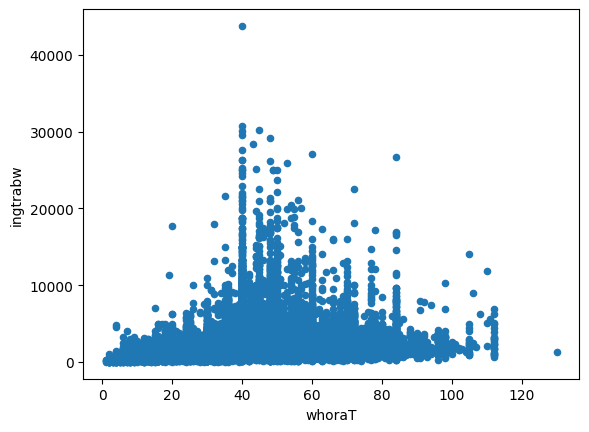

In [33]:
df_DP.plot.scatter("whoraT","ingtrabw")

2 outliers:
- whoraT > 120
- ingtrabw >40000

In [36]:
df_DP.loc[df_DP["ingtrabw"] > 40000]

,CIUDAD,ANIO,MES,AREA,ESTRATO,C203,C204,C205,C206,C207,C208,C301_DIA,C301_MES,C301_ANIO,C303,C304,C305,C306_1,C306_2,C306_3,C306_4,C306_5,C306_6,C306_7,C306_8,C306_9,C306_10,C306_10A,C306_11,C306A,C308_COD,C309_COD,C310,C311,C312,C313,C317,C317A,C318_T,C328_T,whoraT,C330,C331,C333,C334,C335,C338,C339_1,C341_T,C342,C344,C345_1,C347_T,C348,C350,C352,C353,C354,C355,C356,C357_I,C358,C359,OCUP300,D341_T,D344,D347_T,D350,D351_T,I339_1,I342,I345_1,I348,INGTOT,INGTOTP,ingtrabw
141279,LIMA,2023,8,1,1,1,1,2,NaN,1,62.0,21.0,11.0,1960.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1167.0,6512.0,3,5,1,NaN,5,700.0,40.0,NaN,40.0,1,NaN,2,NaN,2,4,35000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,8751.0,35000.0,NaN,NaN,NaN,35000.0,35000.0,43751.0


---

In [55]:
df_DP.loc[df_DP["C207"] == "1"]

,CIUDAD,ANIO,MES,AREA,ESTRATO,C203,C204,C205,C206,C207,C208,C301_DIA,C301_MES,C301_ANIO,C303,C304,C305,C306_1,C306_2,C306_3,C306_4,C306_5,C306_6,C306_7,C306_8,C306_9,C306_10,C306_10A,C306_11,C306A,C308_COD,C309_COD,C310,C311,C312,C313,C317,C317A,C318_T,C328_T,whoraT,C330,C331,C333,C334,C335,C338,C339_1,C341_T,C342,C344,C345_1,C347_T,C348,C350,C352,C353,C354,C355,C356,C357_I,C358,C359,OCUP300,D341_T,D344,D347_T,D350,D351_T,I339_1,I342,I345_1,I348,INGTOT,INGTOTP,ingtrabw
23727,CHICLAYO,2023,10,1,1,3,1,2,NaN,1,48.0,1.0,3.0,1975.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9313.0,4100.0,3,5,3,3,1,4.0,40.0,NaN,40.0,1,NaN,2,NaN,2,3,900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,1800.0,NaN,NaN,NaN,1800.0,1800.0,1800.0
23776,CHICLAYO,2023,10,1,1,2,1,2,NaN,1,68.0,25.0,9.0,1955.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.0,8521.0,3,2,NaN,NaN,5,9998.0,40.0,NaN,40.0,1,NaN,1,1,1,4,2515.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,100.0,2515.0,NaN,NaN,NaN,2515.0,2515.0,2615.0
23803,CHICLAYO,2023,10,1,1,1,1,2,NaN,1,53.0,11.0,12.0,1969.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8331.0,4921.0,3,5,2,1,1,6.0,20.0,NaN,20.0,1,NaN,1,1,2,2,300.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,87.0,NaN,NaN,NaN,NaN,1299.0,NaN,NaN,NaN,1386.0,1386.0,1386.0
23807,CHICLAYO,2023,10,1,1,3,1,2,NaN,1,19.0,15.0,12.0,2003.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5141.0,9602.0,3,5,2,2,1,2.0,50.0,NaN,50.0,1,NaN,2,NaN,2,2,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,1299.0,NaN,NaN,NaN,1299.0,1299.0,1299.0
23810,CHICLAYO,2023,10,1,1,2,1,2,NaN,1,41.0,15.0,3.0,1982.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9211.0,141.0,3,5,3,3,1,2.0,30.0,NaN,48.0,2,48.0,1,1,1,2,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,520.0,NaN,NaN,NaN,520.0,520.0,520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247507,TUMBES,2023,12,1,3,1,1,2,NaN,1,55.0,4.0,12.0,1968.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2330.0,8521.0,3,2,NaN,NaN,5,9998.0,40.0,NaN,40.0,1,NaN,2,NaN,2,4,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,100.0,3000.0,NaN,NaN,NaN,3000.0,3000.0,3100.0
247510,TUMBES,2023,12,1,3,1,1,2,NaN,1,60.0,8.0,7.0,1963.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7111.0,4210.0,3,5,1,NaN,1,15.0,48.0,NaN,48.0,1,NaN,2,NaN,2,4,2500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,250.0,2500.0,NaN,NaN,NaN,2500.0,2500.0,2750.0
247514,TUMBES,2023,12,1,3,1,1,2,NaN,1,42.0,7.0,7.0,1981.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2611.0,8411.0,3,2,NaN,NaN,5,9998.0,24.0,NaN,40.0,2,40.0,2,NaN,2,4,7500.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,351.0,NaN,NaN,NaN,1283.0,7500.0,NaN,NaN,NaN,7851.0,7851.0,9134.0
247548,TUMBES,2023,12,1,3,1,1,2,NaN,1,39.0,31.0,7.0,1984.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9211.0,122.0,3,5,3,2,1,2.0,24.0,NaN,24.0,1,NaN,1,1,2,2,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,693.0,NaN,NaN,NaN,693.0,693.0,693.0


<Axes: xlabel='whoraT', ylabel='INGTOT'>

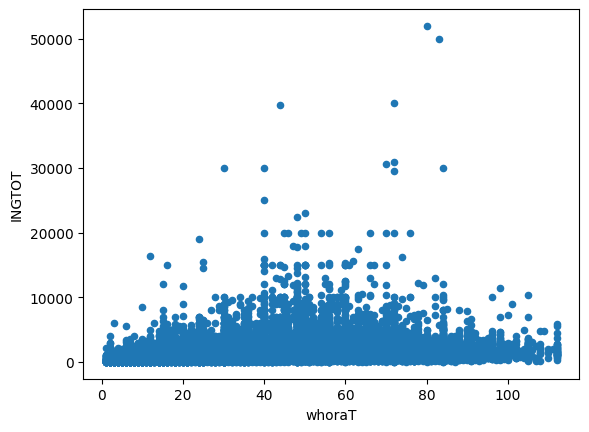

In [41]:
df_IP.plot.scatter("whoraT","INGTOT")

<Axes: xlabel='whoraT', ylabel='INGTOT'>

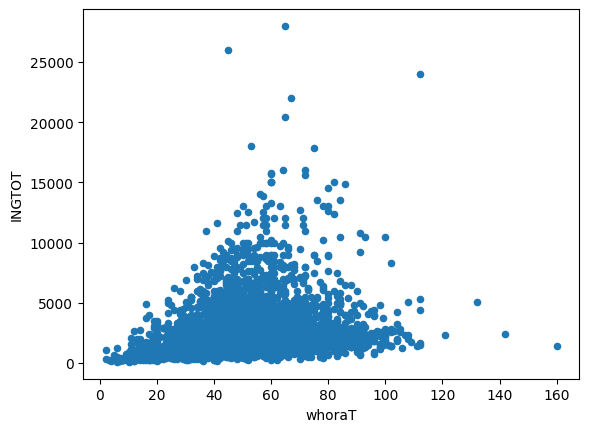

In [42]:
df_DP_IS.plot.scatter("whoraT","INGTOT")

# CHECK FOR UNIQUES!!!, MAYBE AS TEXT VALUES:
C204,C207,C357_I